#HUMAN ACTIVITY RECOGNITION USING SMARTPHONE

### INTRODUCTION

Human Activity Recognition (HAR) has wide applications in healthcare (remote monitoring of patients), smart environments (smart homes, IoT etc.), sports (fitness applications and monitoring), and many more.

Nowadays, where nearly every smartphone (or smart watch) comes equipped with built in inertial sensors, such as accelerometers and gyroscopes, the technology for HAR is available for almost everybody.

Our goal is to built an HAR classification system, using accelerometer and gyroscope data generated by the user’s cell phone.

The data is taken from the Human Activity Recognition database, built from the recordings of 30 subjects performing activities of daily living while carrying a waist-mounted smartphone with embedded inertial sensors.

We will try and test different predictive algorithms, and estimate the models' accuracy on an independent test set.

### DESCRIPTION OF EXPERIMENT

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities:

 1.⁠ ⁠Walking uptairs

 2.⁠ ⁠walking downstairs

 3.⁠ ⁠sitting

 4.⁠ ⁠standing

 5.⁠ ⁠laying

 6.⁠ ⁠walking

The activities where performed while wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, the researchers captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded in order for the researchers to annotate the data manually.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

The obtained data set, which consists of 562 features (explanatory variables) and the response, has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/train_aml.csv')
df = pd.read_csv('/content/train.csv')
df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
df.shape

(7352, 563)

In [ ]:
# checking for null values
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
# Remove rows with any missing or null values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [ ]:
df.shape

(7352, 563)

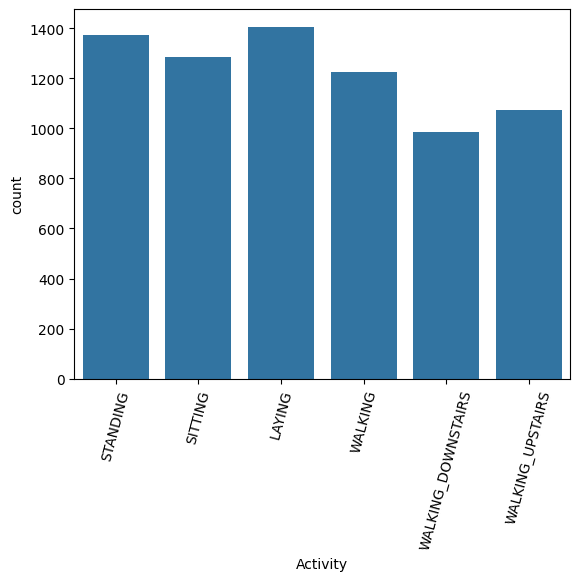

In [ ]:
#Creating a countplot of activity types from a DataFrame
label = df['Activity']
sns.countplot(x= label)
plt.xticks(rotation=75);

##Label encoding

In [ ]:
#Encoding Activity column from categorical to numerical values

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Activity'] = label_encoder.fit_transform(df['Activity'])

# Create a label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


print(label_mapping)
print()
df.head(5)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2


## Outlier detection and removal

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for each feature independently
z_scores = np.abs(zscore(df, axis=0))

# Define feature-specific thresholds (adjust as needed)
feature_thresholds = np.ones_like(z_scores) * 3

# Create a mask indicating outliers for each feature
outlier_mask = (z_scores > feature_thresholds)

# Remove rows containing outliers in any feature
df_no_out = df[~outlier_mask.any(axis=1)]

# Optionally, print the number of rows removed
print(f"Number of rows removed: {len(df) - len(df_no_out)}")


Number of rows removed: 4553


In [ ]:
X = df_no_out.drop('Activity', axis=1)  # Exclude the target variable
y = df_no_out['Activity']

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std=scaler.fit_transform(X)

##PCA

In [ ]:
# Create a PCA object
pca = PCA(n_components=X_std.shape[1])  # Use the maximum number of components initially

# Fit the PCA model
pca.fit(X_std)

# Identify the number of components needed for a certain level of cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
desired_variance_threshold = 0.70  # Adjust as needed

# Find the index where cumulative explained variance exceeds the threshold
num_components_needed = np.argmax(cumulative_explained_variance >= desired_variance_threshold) + 1

# Use the identified number of components for further analysis or dimensionality reduction
pca_final = PCA(n_components=num_components_needed)
X_pca = pca_final.fit_transform(X_std)

# Print the number of components needed
print(f"Number of components needed: {num_components_needed}")
print(X_pca)

Number of components needed: 7
[[-1.16942816e+01  6.35494455e-01 -5.18993485e+00 ...  1.67919662e+00
  -4.68786498e-01  5.51437186e-01]
 [-1.22729417e+01  2.97020224e+00 -3.29646150e+00 ... -1.21871522e+00
  -1.28550595e+00  4.95624843e-01]
 [-1.15645667e+01  1.45025474e+00 -4.05045840e+00 ...  2.59131924e-01
   2.57146493e-01  2.70106984e-01]
 ...
 [ 3.04193494e+01 -1.01915044e+01  1.91396151e+00 ...  6.72769424e-02
  -7.49474295e+00 -2.84204652e+00]
 [ 3.00954395e+01 -6.25133262e+00  1.34761657e+00 ...  3.12021116e+00
  -6.58697932e+00  1.19464480e+00]
 [ 2.35804844e+01 -1.11950066e+01  1.88848825e+00 ... -1.09755347e+00
  -6.01476488e+00  2.40618611e-02]]


In [ ]:
# Create a DataFrame with PCA results
data_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

df_final = pd.concat([data_pca, df_no_out['Activity']], axis=1)

In [ ]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Activity
0,-11.694282,0.635494,-5.189935,0.252050,1.679197,-0.468786,0.551437,NaN
1,-12.272942,2.970202,-3.296462,-0.981413,-1.218715,-1.285506,0.495625,NaN
2,-11.564567,1.450255,-4.050458,-0.008258,0.259132,0.257146,0.270107,2.0
3,-11.655402,-0.029546,-3.581626,0.425142,2.199092,0.356911,2.677716,NaN
4,-11.990037,1.185429,-3.932491,0.401880,2.937573,-0.407395,2.350251,NaN


In [ ]:
df_final.dropna(axis=0, inplace=True)

df_final.reset_index(drop=True, inplace=True)

In [ ]:
df_final.isnull().sum()

PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
PC7         0
Activity    0
dtype: int64

In [ ]:
df_final.shape

(917, 8)

In [ ]:
df_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Activity
0,-11.564567,1.450255,-4.050458,-0.008258,0.259132,0.257146,0.270107,2.0
1,-10.654296,0.851063,-3.444721,-1.406946,-4.208151,0.811409,-0.896727,2.0
2,-10.948488,1.602512,-3.698500,-0.965348,-3.422975,0.831672,-0.514847,2.0
3,-13.052798,6.080246,-3.103104,1.479274,2.853447,-1.709428,-1.623832,2.0
4,-11.817929,-1.226301,-3.820763,1.869336,3.880345,-0.920776,1.947265,2.0


In [ ]:
X = df_final.drop('Activity', axis=1)  # Exclude the target variable
y = df_final['Activity']

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree

In [ ]:
X = df_final.drop('Activity', axis=1)  # Exclude the target variable
y = df_final['Activity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {rf_accuracy * 100:.2f}%')
print()
print(f"Confusion Matrix:\n{conf_matrix}")
print()
print(f"Classification Report:\n{classification_rep}")

Accuracy: 34.24%

Confusion Matrix:
[[ 2  6  9  2  0  2]
 [ 7 21 17  5  0  5]
 [ 4 14 25  3  0  3]
 [ 2  3 15  3  0  4]
 [ 0  2  3  1  0  1]
 [ 1  3  8  1  0 12]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.12      0.10      0.11        21
         1.0       0.43      0.38      0.40        55
         2.0       0.32      0.51      0.40        49
         3.0       0.20      0.11      0.14        27
         4.0       0.00      0.00      0.00         7
         5.0       0.44      0.48      0.46        25

    accuracy                           0.34       184
   macro avg       0.25      0.26      0.25       184
weighted avg       0.32      0.34      0.32       184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Convert class names to strings
class_names = y.unique().astype(str)

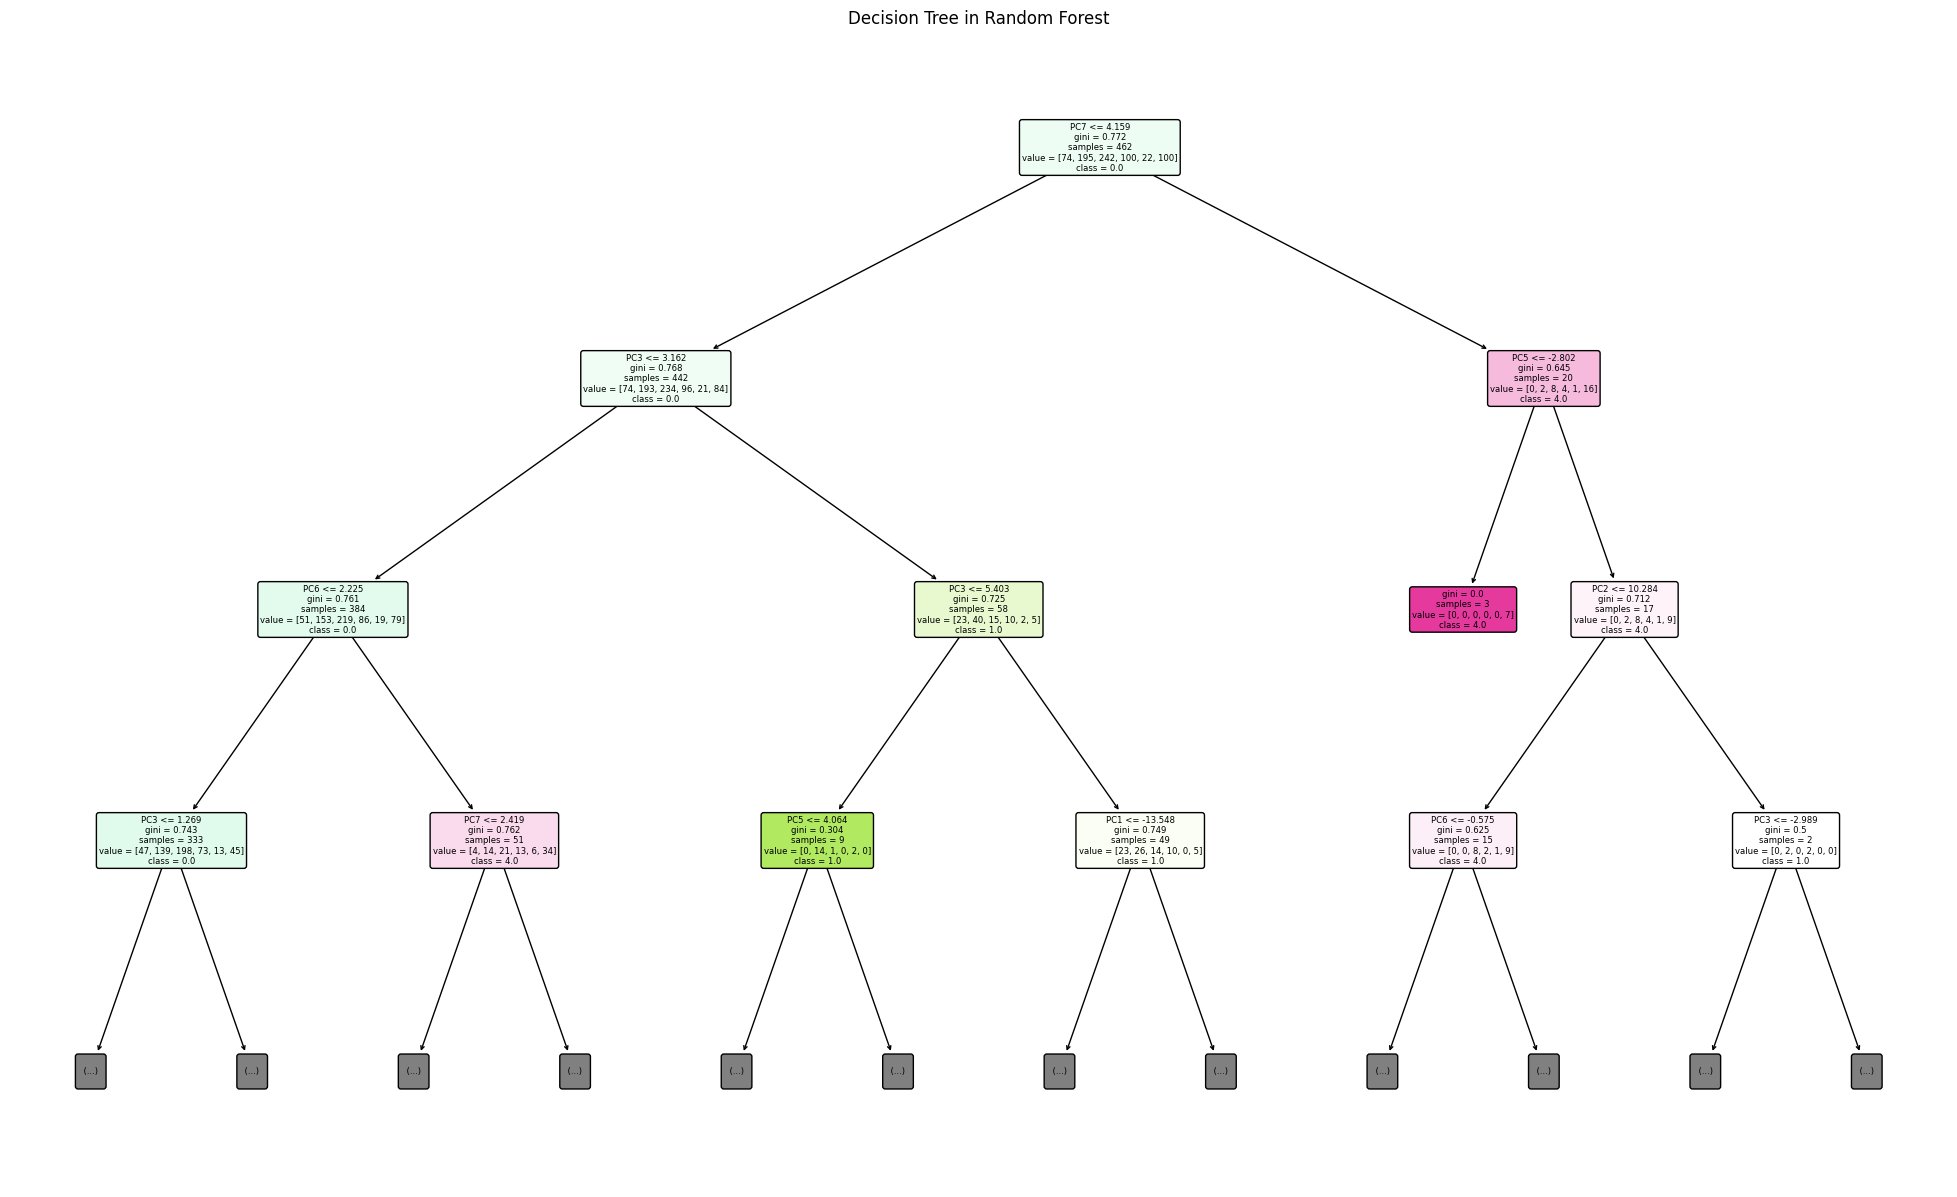

In [ ]:

# Visualize one of the decision trees in the Random Forest
plt.figure(figsize=(25, 15))
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=class_names, filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree in Random Forest")
plt.show()

# KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the KNN classifier ( 'n_neighbors' parameter)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 33.15%


# KMEANS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

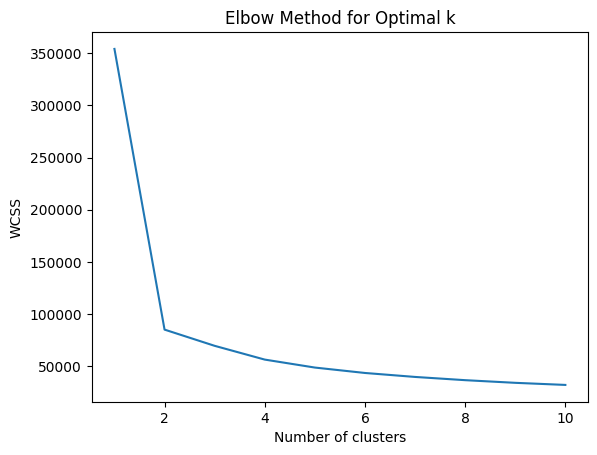

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


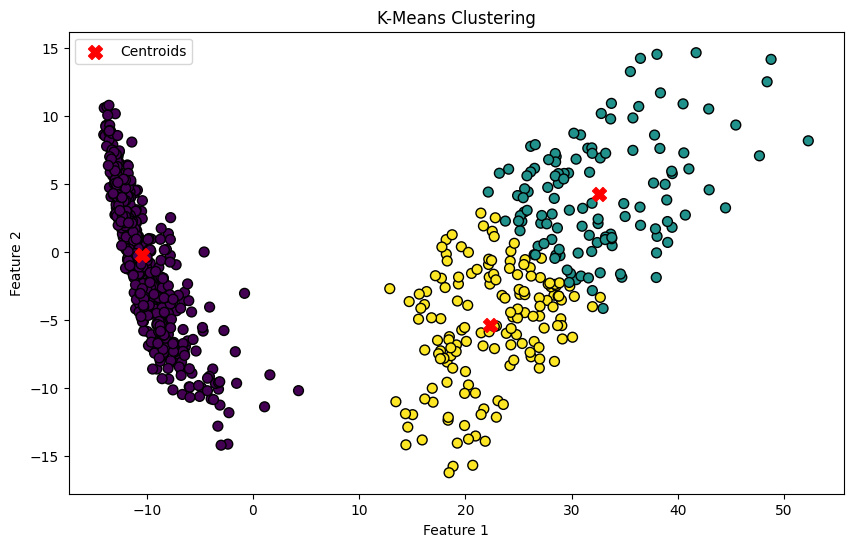

In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the data and clusters
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
plt.scatter(X.values[:, 0], X.values[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_final, kmeans.labels_)
print('Silhouette Average',silhouette_avg)

Silhouette Average 0.5797618492982084


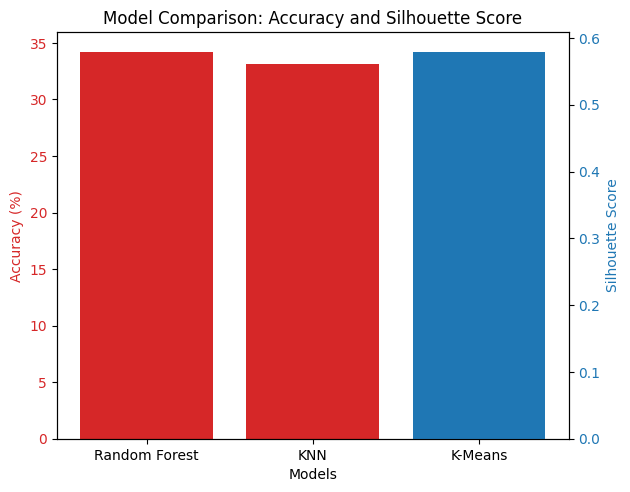

In [ ]:
# Model names
models = ['Random Forest', 'KNN', 'K-Means']

# Corresponding metric values
accuracy_scores = [rf_accuracy * 100, accuracy_knn * 100, None]  # K-Means does not have accuracy
silhouette_scores = [None, None, silhouette_avg]

# Remove None values for plotting
accuracy_scores = [score if score is not None else np.nan for score in accuracy_scores]
silhouette_scores = [score if score is not None else np.nan for score in silhouette_scores]

# Bar plot for accuracy
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.bar(models, accuracy_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot silhouette score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.bar(models, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Model Comparison: Accuracy and Silhouette Score')
plt.show()


## INFERENCE


The analysis of the various models applied to the 'human activity recognition with
smartphones' dataset provides valuable insights.

The Random Forest classifier yielded an
accuracy of 37.50%, showcasing its ability to capture certain activity patterns. However,
addressing class imbalance and further hyperparameter tuning could enhance its overall
performance.

The k-Nearest Neighbors (KNN) model achieved an accuracy of 33.15%, and
optimizing the 'k' parameter, feature scaling, and exploring alternative algorithms could lead
to improvement.


The K-Means clustering approach resulted in a silhouette score of 0.5797, indicating
moderate cohesion among identified clusters. This unsupervised technique offers valuable
insights into underlying patterns within the dataset, potentially aiding feature engineering and
model interpretation. However, further exploration of clustering parameters and alternative
algorithms may refine the results.